In [77]:
import os
import sys
import urllib.request
import numpy as np
import pandas as pd
import time
import json
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt


from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Naver API 예제

In [48]:
# 검색어 입력
keyword = input("검색어 : ")

# 검색 기간 설정
# day로 설정할 경우 relativedelta 대신 timedelta t사용
day = datetime.now()
startDate =(day-relativedelta(months=1)).strftime('%Y-%m-%d')
endDate = day.strftime('%Y-%m-%d')

# 요청할 data
body = {
    'startDate': startDate,
    'endDate': endDate,
    'timeUnit': "date",
    'keywordGroups': [
        {'groupName': keyword, 'keywords': [keyword]},
    ]
}
# POST 요청을 위해 JSON 직렬화 및 인코딩
json_body = json.dumps(body).encode("utf-8")

# header에 APi 정보 추가  
header = {
    "X-Naver-Client-Id": os.environ.get('client_id'),  
    "X-Naver-Client-Secret": os.environ.get('client_secret'),
    "Content-Type": "application/json"
}

# request
url = "https://openapi.naver.com/v1/datalab/search"
request = urllib.request.Request(url, headers=header, data=json_body)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_data= response_body.decode('utf-8')
    print(response_data)
else:
    print("Error Code:" + rescode)




{"startDate":"2024-04-10","endDate":"2024-05-10","timeUnit":"date","results":[{"title":"에버랜드","keywords":["에버랜드"],"data":[{"period":"2024-04-10","ratio":85.76641},{"period":"2024-04-11","ratio":90.65493},{"period":"2024-04-12","ratio":100},{"period":"2024-04-13","ratio":81.84379},{"period":"2024-04-14","ratio":71.86552},{"period":"2024-04-15","ratio":85.44981},{"period":"2024-04-16","ratio":86.26277},{"period":"2024-04-17","ratio":90.23905},{"period":"2024-04-18","ratio":89.5039},{"period":"2024-04-19","ratio":81.47621},{"period":"2024-04-20","ratio":69.3354},{"period":"2024-04-21","ratio":77.72262},{"period":"2024-04-22","ratio":94.91561},{"period":"2024-04-23","ratio":87.3977},{"period":"2024-04-24","ratio":83.10482},{"period":"2024-04-25","ratio":94.31998},{"period":"2024-04-26","ratio":97.11035},{"period":"2024-04-27","ratio":93.52579},{"period":"2024-04-28","ratio":78.54363},{"period":"2024-04-29","ratio":97.47793},{"period":"2024-04-30","ratio":95.89761},{"period":"2024-05-01","r

- DataFrame으로 출력

In [63]:
# json 형태로 전환
result = json.loads(response_data)
# type(result)

# 변수에 저장
date = [i['period'] for i in result['results'][0]['data']]
ratio = [i['ratio'] for i in result['results'][0]['data']]

df_search = pd.DataFrame({"date": date, "ratio":ratio})
df_search

,date,ratio
0,2024-04-10,85.76641
1,2024-04-11,90.65493
2,2024-04-12,100.00000
3,2024-04-13,81.84379
4,2024-04-14,71.86552
5,2024-04-15,85.44981
6,2024-04-16,86.26277
7,2024-04-17,90.23905
8,2024-04-18,89.50390
9,2024-04-19,81.47621


- 꺾은선 그래프

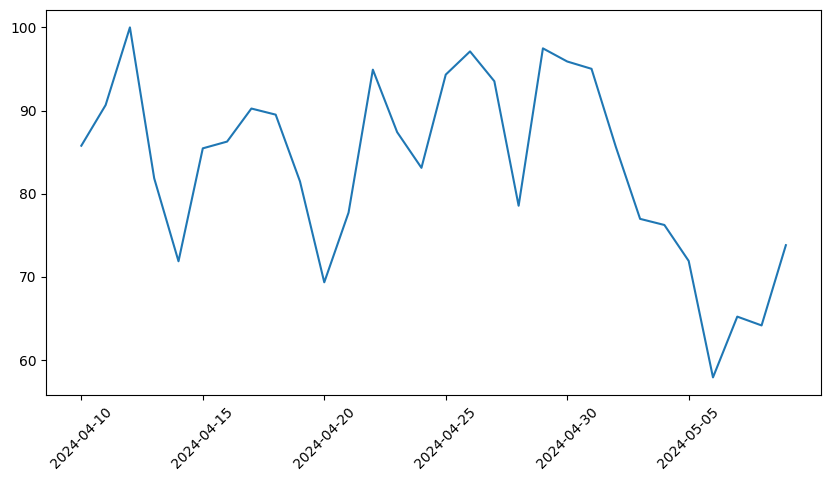

In [94]:
plt.figure(figsize=(10,5))
plt.plot(df_search['date'], df_search['ratio'])
plt.xticks(np.arange(0,30,5), rotation=45)
plt.show()